<h1>An Introduction to Fuzzy C-means</h1>
<br>
<code>Fuzzy C-Means</code> is <i>soft-clustering algorithm</i>. This algorithm has a similar functionality and objective as the standard K-means but it differencess itself by allowing the management of membership degrees (corresponding to probabilities), these probabilities are the similarity of a sample with all cluster centroids, this is why <code>Fuzzy C-Means</code> is considered a <i>soft-clustering algorithm</i>. This approach allows the membership vectors be processed in a more complex pipeline, for classifying similarites between samples.

Let's imagine that we have an unlabeled dataset,  if we split our dataset into labeled partitions, a hard clustering approach would assign a label to each sample, while a <b>fuzzy (or soft)</b> approach would allow the management of a <i>membership degree or similarity degree</i> $w_{ij}$, which expresses how strong the relationship is between a sample $x_i$ and cluster $c_j$.
<br>
<br>
When we employed <i>Fuzzy Logic</i>, asymmetric sets becomes possible to be defined, these set can not be represented with a continuous functions. <code>Fuzzy C-Means</code> allows more flexibility and increases the ability to adapt to more complex geometries or sets. Let's see a distribution graph as an example of <i>fuzzy sets</i>:

<div>
    <img src='images/0.png'>
</div>

The above distribution graph is a <i>fuzzy set</i> that represents the seniority level of an employee according to years of experience.

When we are dealing with unsupervised problemas we usually want to cluster the entire population into $n$ groups, in the case of the above distribution graph, the population was clustered into three level employee groups: 
<ul>
    <li>Junior</li>
    <li>Middle</li>
    <li>Senior</li>
</ul>
Therefore three <i>fuzzy sets</i> were designed. According the graph we can see that a young employee is devoted and quickly reach the Junior level after an initial apprenticeship period. As usual the opportunity and ability to work on complex problems brings them the change to develop skills that are fundamental to become Middle levels employees. Then almost 10 years later, the employee can begin to consider themselves as a Senior apprentice and after about 25 years, their experience is enough to qualify them as a full Senior until the end of their career.

Let's do some <i>Fuzzy Logic Thinking</i>, the employee Carl who has 7 years of experience with employee Matt who has 15 years of experience. Carl is about 25% Junior <i>(decreasing even if with a minimum slope)</i>, 25% Middle <i>(reaching its climax)</i> and almost 0% Senior <i>(increasing)</i>. Matt is 0% Junior <i>(ending plateau)</i>, about 0% Middle <i>(decreasing)</i> and close to 100% Senior <i>(ending plateau)</i>. In both cases, the values are not normalized so always sum up to 1 because we are more interested in showing the process and the proportions.

The fuzziness level is lower in extreme cases, while it is higher when two sets intersect. For example, at about 15%, the Middle and Senior are about 50%. As we're going to discuss, <b>it's useful to avoid a very high fuzziness level when clustering a dataset because it can lead to a lack of precision as the boundaries fade out, becoming completely fuzzy.</b>

<code>Fuzzy C-means</code> is a generalization of standard <code>K-means</code>, with a soft assignment and more flexible clusters. The dataset to cluster (containing $M$ samples) is represented by:
<br>
<div>
    <img src='images/1.png'>
</div>

If we assume we have $k$ clusters, it's necessary to define a matrix $W \in \mathbb{R}^{M\times k}$ containing the membership degrees for each sample:
<br>
<br>
<div>
    <img src='images/2.png'>
</div>

Each degree $w_{ij}\in (0, 1) $ and all rows must be normalized so that they always sum up to 1. In this way, the membership degrees can be considered as probabilities (with the same semantics) and it's easier to make decisions with a prediction result. If a hard assignment is needed, the winning cluster will be selected by applying the argmax function. However, it's good practice to employ soft clustering only when it's possible to manage the vectorial output. For example, the probabilities/membership degrees can be fed into a classifier in order to yield more complex predictions.
<br>
<br>
As with K-means, the problem can be expressed as the minimization of generalized inertia:
<br>
<br>
<div>
    <img src='images/3.png'>
</div>

The constant $m \; (m > 1)$ is an exponent employed to re-weight the membership degrees. A value very close to $1$ doesn't affect the actual values. Greater $m$ values reduce their magnitude. The same parameter is also used when recomputing the centroids and the new membership degrees and can lead to a different clustering result.
<br>
<br>
It's rather difficult to define a globally acceptable value; therefore, a good practice is to start with an average $m$ (for example, $1.5$) and perform a grid search (it's possible to sample from a Gaussian or uniform distribution) until the desired accuracy has been achieved.

Minimizing the previous expression is even more difficult than with standard inertia; after a random initialization, the algorithm proceeds, alternating two steps in order to determine the centroids and recomputing the membership degrees to maximize the internal cohesion. The centroids are determined by a weighted average:
<br>
<br>
<div>
    <img src='images/4.png'>
</div>

Contrary to <code>K-means</code>, the sum is not limited to the points belonging to a specific cluster because the weight factor will force the farthest points ($w_{ij} \thickapprox 0$) to produce a contribution close to $0$. At the same time, as this is a <i>soft-clustering algorithm</i>, no exclusions are imposed, to allow a sample to belong to any number of clusters with different membership degrees. Once the centroids have been recomputed, the membership degrees must be updated using this formula:
<br>
<br>
<div>
    <img src='images/5.png'>
</div>

This function behaves like a similarity. In fact, when sample $x_i$ is very close to centroid $u_j$  <i>(and relatively far from $u_p$ with $p \neq j$)</i>, the denominator becomes small and $w_{ij}$ increases. The exponent $m$ directly influences the fuzzy partitioning, because when  $m \thickapprox 1$<sup>$(m > 1)$</sup>, the denominator is a sum of quasi-squared terms and the closest centroid can dominate the sum, yielding to a higher preference for a specific cluster. When $m >> 1$, all the terms in the sum tend to $1$, producing a flatter weight distribution with no well-defined preference.

It's important to understand that, even when working with soft clustering, a fuzziness excess leads to inaccurate decisions because there are no factors that push a sample to clearly belong to a specific cluster. This means that the problem is either ill-posed or, for example, the number of expected clusters is too high and doesn't represent the real underlying data structure. A good way to measure how much this algorithm is similar to a hard-clustering approach (such as <code>K-means</code>) is provided by the normalized Dunn's partitioning coefficient:
<br>
<br>
<div>
    <img src='images/6.png'>
</div>

When $P_c$ is bounded between $0$ and $1$, when it's close to $0$, it means that the membership degrees have a flat distribution and the level of fuzziness is the highest possible. On the other hand, if it's close to 1, each row of $W$ has a single dominant value, while all the others are negligible. This scenario resembles a hard-clustering approach. <i>Larger $P_c$ values are normally preferable because, even without allowing a degree of fuzziness, they allow the making of more precise decisions.</i>

Considering the previous example, $P_c$ tends to $1$ when the sets don't intersect, while it becomes $0$ (complete fuzziness) if, for example, the three seniority levels are chosen to be identical and overlapping. Of course, we are interested in avoiding such extreme scenarios by limiting the number of borderline cases. A grid search can be performed by analyzing different numbers of clusters and $m$ values (in the example, we're going to do this with the MNIST handwritten digit dataset).
<br>
<br>
<i>A reasonable rule of thumb is to accept $P_c$ values higher than 0.8, but in some cases that can be impossible.</i> If we are sure that the problem is well-posed, the best approach is to choose the configuration that maximizes $P_c$, considering, however, that a final value of less than $0.3 - 0.5$ will lead to a very high level of uncertainty because the clusters will overlap extremely.

The complete <code>Fuzzy C-means</code> algorithm is:
<ol>
    <li>Set a maximum number of iterations $N_{max}$</li>
    <li>Set a tolerance $Thr$</li>
    <li>Set the value of $k$ (the number of expected clusters)</li>
    <li>Initialize the matrix $W$<sup>$(0)$</sup> with random values and normalize each row, dividing it by its sum</li>
    <li>Set $N = 0$</li>
    <li>While $N < N_{max}$ or $\Arrowvert$ $W$<sup>$(t)$</sup> $-$ $W$<sup>$(t-1)$</sup>$\Arrowvert > Thr$
        <ol>
            <li>$N = N + 1$</li>
            <li>$For j = 1\;to\;k:$
                <ol>
                    <li>Compute the centroid vectors $u_j$</li>
                </ol>
            </li>
            <li>Recompute the weight matrix $W$<sup>$(t)$</sup></li>
            <li>Normalize the rows of $W$<sup>$(t)$</sup></li>
        </ol>
    </li>
    
</ol>

After the theoretical discussion, we can now analyze a concrete example of this algorithm using the <code>scikit-fuzzy</code> a <code>Python</code> package, comparing the results with a classical hard-clustering approach.

<h2>Fuzzy C-means with <code>scikit-fuzzy</code></h2>
<br>
<code>scikit-fuzzy</code> is a <code>Python</code> package based on <code>scipy</code>, it can be installed using the next command:

In [1]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\kleye\anaconda3\envs\ai\lib\site-packages (0.4.2)


The official documentation of <code>scikit-fuzzy</code> is <a href='https://pythonhosted.org/scikit-fuzzy/'>here</a>.
<br>
<br>
The example we are going to use to understand better and implement <code>Fuzzy C-Means</code> will be worked with the famous MNIST dataset.
<br>
<br>
<code>scikit-fuzzy</code> implements <code>cmeans</code> from the <code>skfuzzy.cluster</code> package.

<h2>Import Libraries, Packages and Other Utilities</h2>

In [9]:
import sys
import arff
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.utils import class_weight
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, KFold, ParameterGrid, LeaveOneOut
from sklearn.metrics import classification_report, f1_score, accuracy_score
from plotly.subplots import make_subplots
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from skfuzzy.cluster import cmeans, cmeans_predict
from sklearn.datasets import load_digits

c:\users\kleye\anaconda3\envs\ai\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<h2>Set Seed for Reproducible Results</h2>

In [3]:
# Set a seed value
seed_value= 42 
# Set 'PYTHONHASHSEED environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set 'python' built-in pseudo-random generator at a fixed value
random.seed(seed_value)
# 3. Set 'numpy' pseudo-random generator at a fixed value
np.random.seed(seed_value)

Let's load the dataset into <code>dataset</code>

In [4]:
dataset = load_digits()

We are goign to create the train set, this will be hold in <code>X_train</code> and we "normalize" the data by dividing the samples by the largest sample from the set.

In [5]:
X_train = dataset['data'] / np.max(dataset['data'])

<h3>Performing Fuzzy C-Means</h3>
<br>
<br>
<code>cmeans</code> have several parameters that will help in returning more reliable membership degrees; it also returns several value, all of these will be explained:

<code>cmeans</code> and its parameters:
<ul>
    <li><code>data</code>: Data to be clustered. $N$ is the number of data sets; $S$ is the number of features within each
        sample vector.</li>
    <li><code>c</code>: Desired number of clusters or classes.</li>
    <li><code>m</code>: Array exponentiation applied to the membership function <code>u_old</code> at each iteration, where 
        <code>U_new = u_old ** m</code>.</li>
    <li><code>error</code>: Stopping criterion; stop early if the norm of <code>(u[p] - u[p-1]) &lt; error</code>, is the 
        maximum tolerance.</li>
    <li><code>maxiter</code>: Maximum number of iterations allowed.</li>
    <li><code>init</code>: Initial fuzzy c-partitioned matrix. If none provided, algorithm is randomly initialized.
        <code>2d array, size (S, N)</code>.</li>
    <li><code>seed</code>: If provided, sets random seed of <code>init</code>. No effect if <code>init</code> is provided. 
        Mainly for debug/testing purposes, which allows you to specify the random seed to be able to easily reproduce the 
        experiments.</li>
</ul>
<code>cmeans</code> returns the next:
<ul>
    <li><code>cntr</code>:Cluster centers. Data for each center along each feature provided for every cluster (of the 
        <code>c</code> requested clusters).</li>
    <li><code>u</code>: Final fuzzy c-partitioned matrix; <i>which is the final membership degree matrix</i>.</li>
    <li><code>u0</code>: Initial guess at fuzzy c-partitioned matrix (either provided init or random guess used if init was not 
        provided).</li>
    <li><code>d</code>: Final Euclidian distance matrix.</li>
    <li><code>jm</code>: Objective function history.</li>
    <li><code>p</code>: Number of iterations run.</li>
    <li><code>fpc</code>: Final fuzzy partition coefficient.</li>
</ul>

Let's start the <i>fuzzy</i> clustering!

In [69]:
cntr, u, u0, d, jm, p, fpc = cmeans(data=X_train.T, c=10, m=1.25, error=1e-6, maxiter=10000, seed=seed_value)

Let's see the <code>fpc</code>, <i>how apart are the clusters?</i>
<br>
<br>
This value informs us that the clustering is not very far from a hard assignment, but there's still a residual fuzziness. In this particular case, such a situation may be reasonable because we know that many digit images are partially distorted, and may appear very similar to other digits (1, 7, and 9 are easily confused). This is define by the <code>m</code> parameter, it does determine the partition coefficient:

In [70]:
print('Partition coeffiecient: {}'.format(fpc))

Partition coeffiecient: 0.6320708718192728


We can now display the centroids:

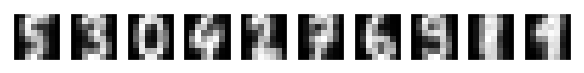

In [71]:
# Plot the centroids
sns.set()
fig, ax = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    c = cntr[i]
    ax[i].matshow(c.reshape(8, 8) * 255.0, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

Centroids obtained by <code>Fuzzy C-Means</code>; all the different digit classes have been successfully found, but now, contrary to <code>K-means</code>, we can check the fuzziness of a problematic sample (representing a 1 with index 1):

Membership degrees: [0.01484762 0.00936747 0.00124938 0.01437914 0.01678198 0.01265008
 0.00569252 0.00491095 0.87234323 0.04777762]


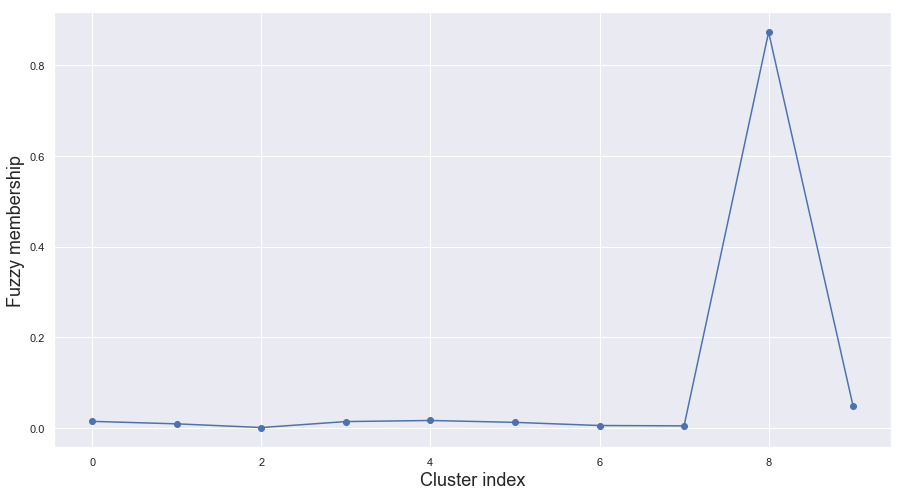

In [73]:
# Membership degrees of a sample representing the digit '1'
print('Membership degrees: {}'.format(u[:, 1]))

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(np.arange(10), u[:, 1], "o-")
ax.set_xlabel('Cluster index', fontsize=18)
ax.set_ylabel('Fuzzy membership', fontsize=18)
ax.grid(True)

plt.show()

In this case, the choice of <code>m</code> has forced the algorithm to reduce the fuzziness.
<br>
<br>
For performing predictions, <code>sciKit-fuzzy</code> implements the <code>cmeans_predict</code> method from the same package than <code>cmeans</code>, which requires the same parameters as <code>cmeans</code>, but instead of the number of clusters, <code>c</code> needs the final centroid array (the name of the parameter is <code>cntr_trained</code>). The function returns as a first value the corresponding membership degree matrix (the other ones are the same as cmeans). In the following cell, we repeat the prediction for the same sample digit (representing a 1):

In [81]:
 new_sample = np.expand_dims(X_train[1], axis=1)
Wn, _, _, _, _, _ = cmeans_predict(new_sample, cntr_trained=cntr, m=1.25, error=1e-6, maxiter=10000, seed=1000)
print('Membership degrees: {}'.format(Wn.T))

Membership degrees: [[0.01484762 0.00936747 0.00124938 0.01437914 0.01678198 0.01265008
  0.00569252 0.00491095 0.87234323 0.04777762]]


Great! We now see the membership degrees predicted for the sample <code>X_train[1]</code>, these membership degrees can be considered as cluster similarities, for example the sample  <code>X_train[1]</code> has a similarity to cluster number $0$ of <b>0.01484%</b> and for cluster $8$ a similarity of <b>0.8723%</b>.
<br>
<h2>Conclusion</h2>
<br>
We have met an algorithm for unsupervised learning, which resolve its found clusters through soft-labeling, this allows us to know how a sample can be releated to other clusters, it bring a wider perspective of how we can approximate a sample, imagine the variaty of options that a recommender system done with <code>Fuzzy C-Means</code> can bring to the final user, it will have a wider range of options or how accertive a DNA sequence classifier can be become when it is done with <code>Fuzzy C-Means</code>.